## Data Preprocessing

In [49]:
# Importing Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.simplefilter('ignore')

In [50]:
## Data : "https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=CF3C72E72A768D9425EB294E08A23F0E94DCBD66F2D9E7BC0C97F95D057DCEC44EE50BB4E15FD68C655616C3A0CF31BE&originRegion=eu-west-1&originCreation=20230117180020"

In [51]:
pd.set_option('display.max_columns', 100)
data = pd.read_csv('https://raw.githubusercontent.com/kevinasyraf/find-it-2020-dac/master/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [52]:
data.shape

(119390, 32)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [54]:
# % of null values present in each column
round((data.isnull().sum()/119390)*100,1)

hotel                              0.0
is_canceled                        0.0
lead_time                          0.0
arrival_date_year                  0.0
arrival_date_month                 0.0
arrival_date_week_number           0.0
arrival_date_day_of_month          0.0
stays_in_weekend_nights            0.0
stays_in_week_nights               0.0
adults                             0.0
children                           0.0
babies                             0.0
meal                               0.0
country                            0.4
market_segment                     0.0
distribution_channel               0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
reserved_room_type                 0.0
assigned_room_type                 0.0
booking_changes                    0.0
deposit_type                       0.0
agent                             13.7
company                           94.3
days_in_waiting_list     



```
# There is a lot of missing data in the company attribute, so it's okay to delete this column
```



In [55]:
data.drop('company', axis = 1, inplace = True)

In [57]:
# Filling the missing values 

data = data.fillna({
    'children' : 0,
    'agent' : 0,
    'country': 'Unknown',})

In [58]:
# Droping rows in which reservations were made without any adults in it
zero_guests = list(data.loc[data["adults"]
                   + data["children"]
                   + data["babies"]==0].index)

In [70]:
data.iloc[2224]

hotel                                Resort Hotel
is_canceled                                     0
lead_time                                       1
arrival_date_year                            2015
arrival_date_month                        October
arrival_date_week_number                       41
arrival_date_day_of_month                       6
stays_in_weekend_nights                         0
stays_in_week_nights                            3
adults                                          0
children                                      0.0
babies                                          0
meal                                           SC
country                                       PRT
market_segment                          Corporate
distribution_channel                    Corporate
is_repeated_guest                               0
previous_cancellations                          0
previous_bookings_not_canceled                  0
reserved_room_type                              A


In [71]:
data.drop(data.index[zero_guests], inplace=True)

## Exploratory Data Analysis

In [72]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## 1. Reservation comparision between Hotel Types

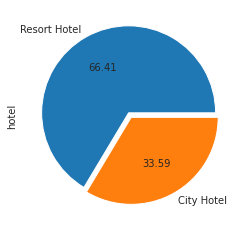

In [81]:
data['hotel'].value_counts().plot(kind = 'pie', explode = [0.03,0.03], labels = data['hotel'].unique(),  autopct='%.2f')

##### In general Resort Hotes are preffered over City Hotels

## 2. Reservation comparision over Countires.

In [101]:
data_country = pd.DataFrame(data.loc[data['is_canceled'] != 1]['country'].value_counts())
data_country.index.name = 'Country'
data_country.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = data_country["Number of Guests"].sum()
data_country["Guests in %"] = round(data_country["Number of Guests"] / total_guests * 100, 2)
data_country.head(10)

,Number of Guests,Guests in %
Country,,
PRT,20977,27.97
GBR,9668,12.89
FRA,8468,11.29
ESP,6383,8.51
DEU,6067,8.09
IRL,2542,3.39
ITA,2428,3.24
BEL,1868,2.49
NLD,1716,2.29


##### Portugal is the most famous destination for hotels followed by other countries.

In [103]:
import plotly.express as px
guest_map = px.choropleth(data_country,
                    locations=data_country.index,
                    color=data_country["Guests in %"], 
                    hover_name=data_country.index, 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Country of origin of hotel guests")
guest_map.show()
     

## 3. Yearly Booking Comparision.

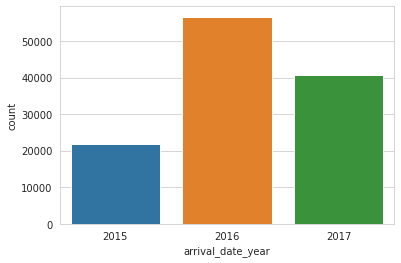

In [105]:
sns.countplot(data['arrival_date_year'])

#### During the year "2016", hotel bookings were at their peak.

## 4. Booking Trend over Months.

In [106]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
guest_data = data[data['is_canceled'] == 0].copy()
guests_monthly = guest_data[['hotel', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies']].sort_values('arrival_date_year')
guests_monthly['total visitors'] = guests_monthly['adults'] + guests_monthly['children'] + guests_monthly['babies']
guests_monthly = guests_monthly.astype({'total visitors' : int})
guests_monthly = guests_monthly.drop(['adults', 'children', 'babies'], axis=1)

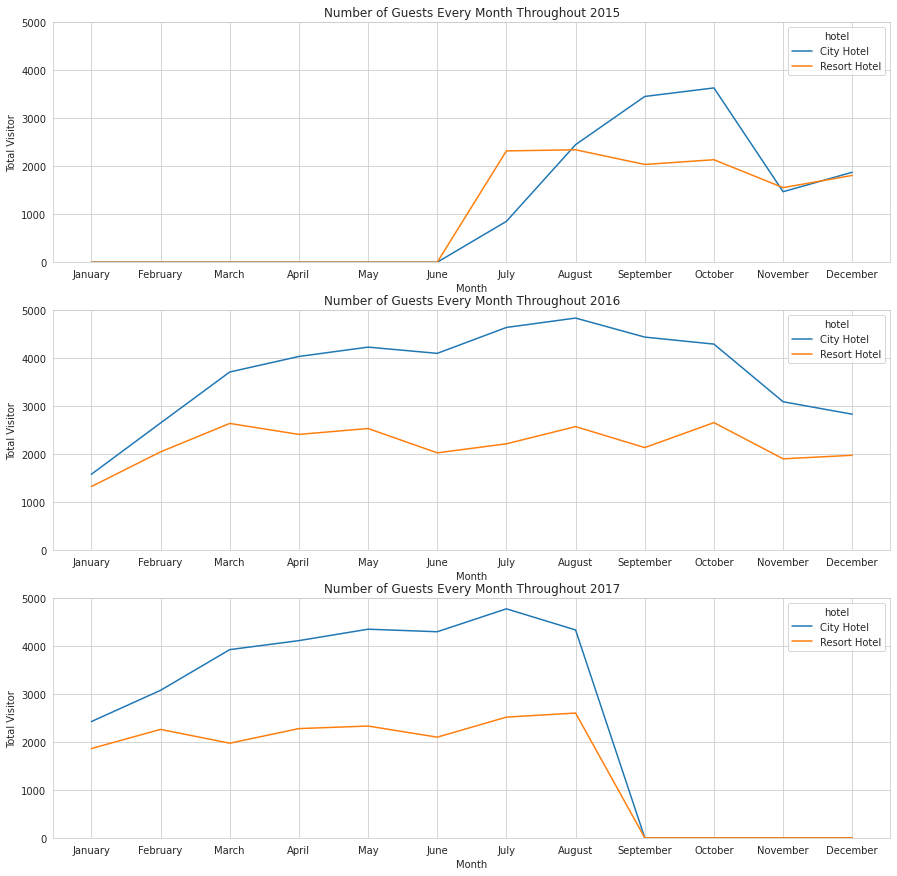

In [108]:
guests_monthly['arrival_date_month'] = pd.Categorical(guests_monthly['arrival_date_month'], categories=months, ordered=True)
guests_monthly = guests_monthly.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'], as_index = False).sum()

f, ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2015],  ci="sd", ax=ax[0])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2016],  ci="sd", ax=ax[1])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2017],  ci="sd", ax=ax[2])

ax[0].set(title="Number of Guests Every Month Throughout 2015")
ax[0].set(xlabel="Month", ylabel="Total Visitor")
ax[0].set(ylim = (0,5000))

ax[1].set(title="Number of Guests Every Month Throughout 2016")
ax[1].set(xlabel="Month", ylabel="Total Visitor")
ax[1].set(ylim = (0,5000))

ax[2].set(title="Number of Guests Every Month Throughout 2017")
ax[2].set(xlabel="Month", ylabel="Total Visitor")
ax[2].set(ylim = (0,5000))

plt.show()

#### We conclude the booking pattern for the years


## 5. Price Comparision for various Room Types.

In [109]:
full_data_guests = data.copy()
full_data_guests = full_data_guests.loc[full_data_guests['is_canceled'] == 0]
full_data_guests['adr_pp'] = full_data_guests['adr'] / (full_data_guests['adults'] + full_data_guests['children'])
room_prices = full_data_guests[['hotel', 'reserved_room_type', 'adr_pp']].sort_values("reserved_room_type")

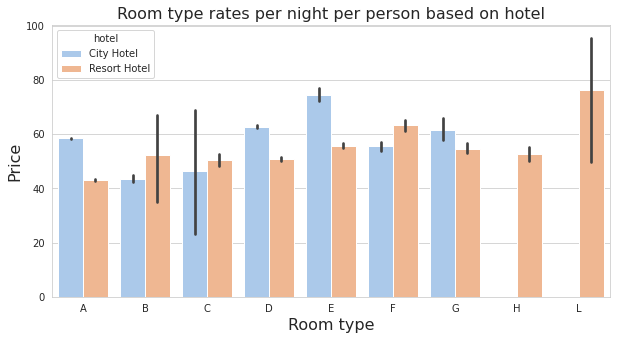

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(x='reserved_room_type', y='adr_pp', hue='hotel', data=room_prices, hue_order=['City Hotel', 'Resort Hotel'], palette='pastel')
plt.title('Room type rates per night per person based on hotel', fontsize=16)
plt.xlabel('Room type', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.show()

## 5. Market segment over bookings.

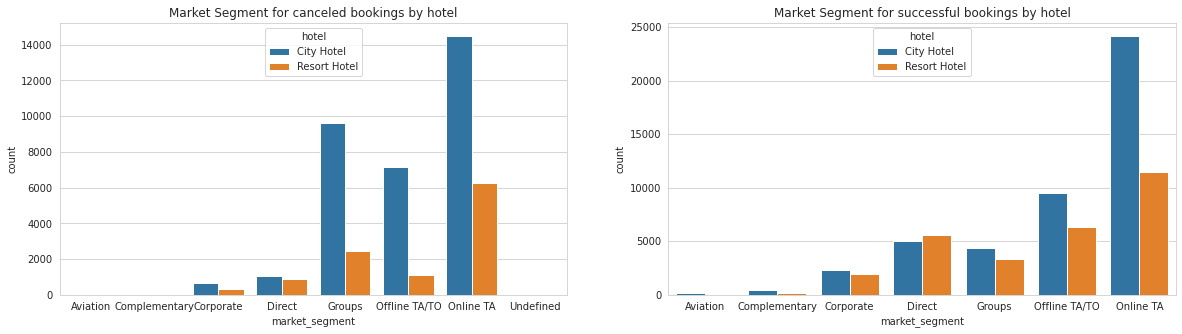

In [111]:
data_canceled = data[data['is_canceled'] == 1].sort_values('market_segment')
data_not_canceled = data[data['is_canceled'] == 0].sort_values('market_segment')
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=data_canceled, x= 'market_segment', hue='hotel', ax =ax[0])
sns.countplot(data=data_not_canceled, x= 'market_segment', hue='hotel', ax =ax[1])
ax[0].set(title='Market Segment for canceled bookings by hotel')
ax[1].set(title='Market Segment for successful bookings by hotel')
plt.show()

## 6. Family/Self Booking Comparision.

In [112]:
adult_only = data[(data['adults'] != 0) & (data['children'] == 0) & (data['babies'] == 0)].sort_values('reserved_room_type')
adult_child = data[(data['adults'] != 0) & (data['children'] != 0) | (data['babies'] != 0)].sort_values('reserved_room_type')

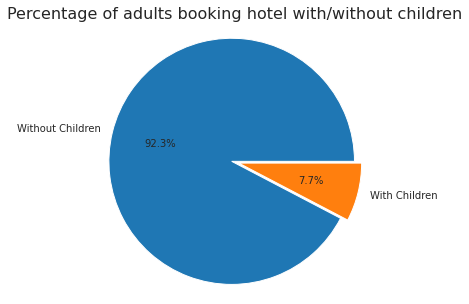

In [117]:

percentage = [(len(adult_only)/(len(adult_only) + len(adult_child)))*100, (len(adult_child)/(len(adult_only) + len(adult_child)))*100]
labels = 'Without Children', 'With Children'

f, ax = plt.subplots(figsize=(5,5))
ax.pie(percentage, labels = labels, autopct='%1.1f%%' , explode = [0.03,0.03])
ax.axis('equal')

ax.set_title('Percentage of adults booking hotel with/without children', fontsize=16)
plt.show()

## 7. Cancelations Report

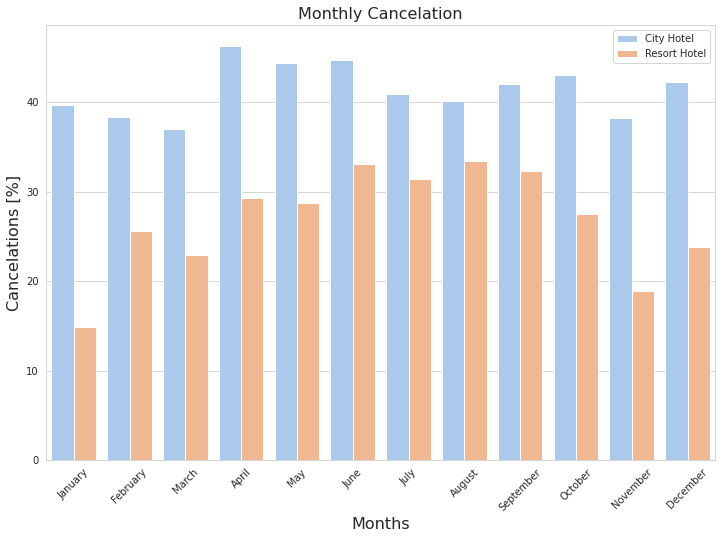

In [118]:

res_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})

cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data, palette = 'pastel')
plt.title("Monthly Cancelation", fontsize=16)
plt.xlabel("Months", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()
     

#### City Hotel cancelation is always higher than Resort type.